**Importing libraries**

In [ ]:
#load in needed libriaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import statsmodels.api as sm
import holoviews as hv
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

**Textual EDA:**
*Making sure no null values and types of each feature.*

In [ ]:
df = pd.read_csv('/content/Customer-Churn-Records (1).csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [ ]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [ ]:
#Unecessary features that won't be needed for Prediction
df = df.drop(columns=(['RowNumber', 'CustomerId', 'Surname']))

Recapped *EDA*

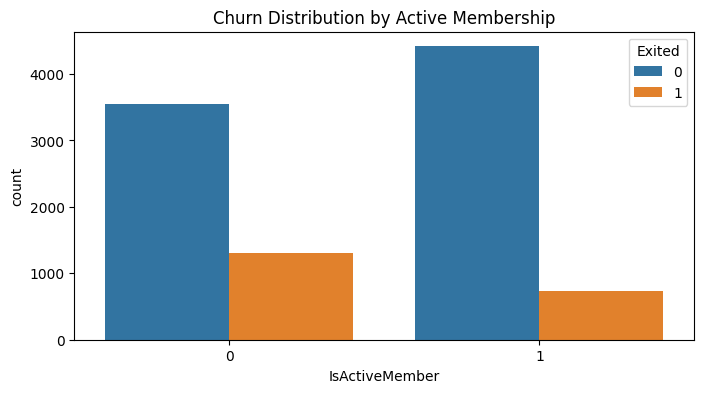

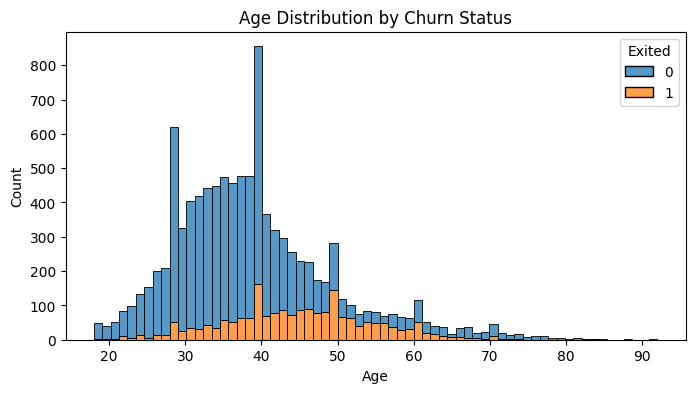

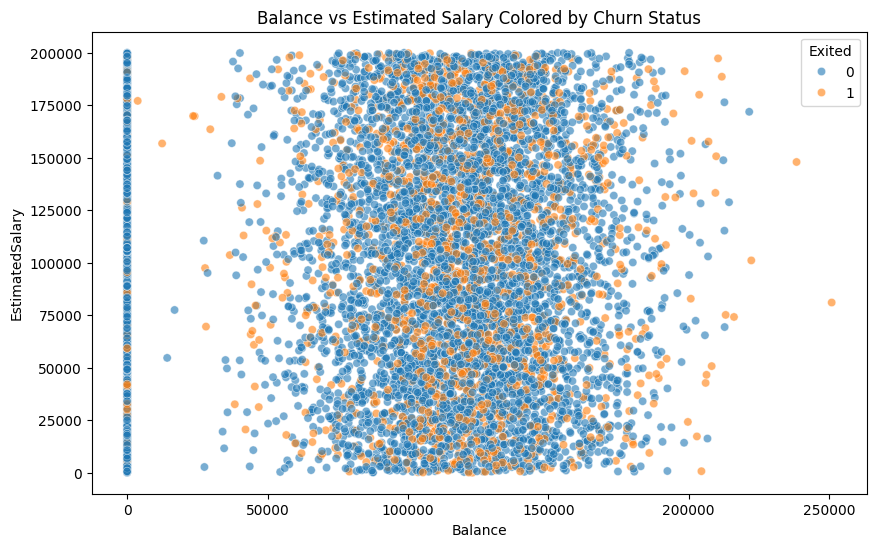

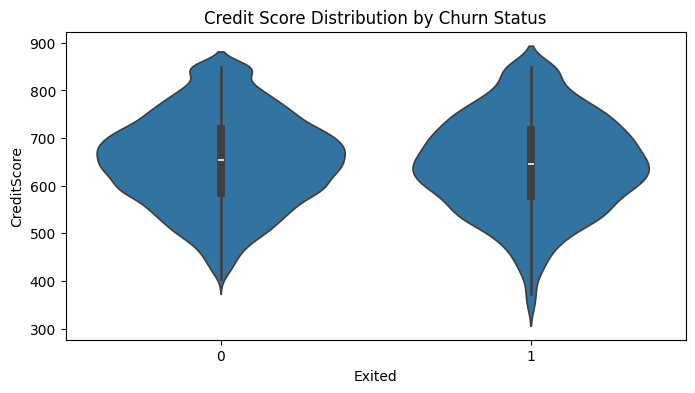

Columns after drop: Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Customer-Churn-Records (1).csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Plot 1: Count plot of active/inactive members and churn
plt.figure(figsize=(8, 4))
sns.countplot(x='IsActiveMember', hue='Exited', data=data)
plt.title('Churn Distribution by Active Membership')
plt.show()

# Plot 2: Histogram of age for churned and retained customers
plt.figure(figsize=(8, 4))
sns.histplot(data=data, x='Age', hue='Exited', multiple='stack')
plt.title('Age Distribution by Churn Status')
plt.show()

# Plot 3: Scatter plot of balance vs estimated salary colored by churn status
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Balance', y='EstimatedSalary', hue='Exited', alpha=0.6)
plt.title('Balance vs Estimated Salary Colored by Churn Status')
plt.show()

# Plot 4: Violin plot of credit score by churn status
plt.figure(figsize=(8, 4))
sns.violinplot(x='Exited', y='CreditScore', data=data)
plt.title('Credit Score Distribution by Churn Status')
plt.show()

# Drop the first three columns
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# Confirm the drop
print("Columns after drop:", data.columns)

# Now you can proceed with the modified dataset
# data.to_csv('path_to_your_modified_file.csv', index=False)  # Uncomment to save the modified file

**EDA** (Mainly Visual)

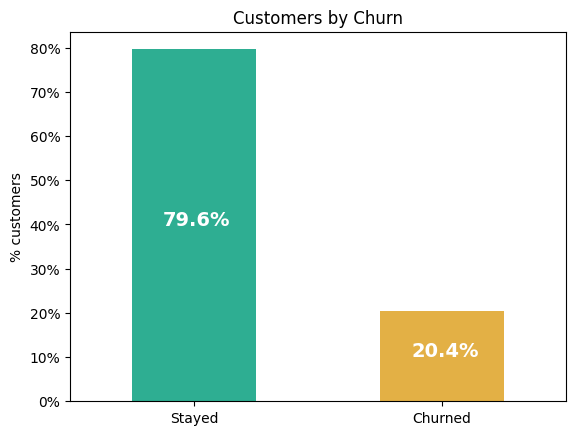

In [ ]:
#What is the percentage of customers that have exited/churned?
colors = ["#2EAE92", "#E3B045"]

ax = (df['Exited'].value_counts()*100 / len(df)).plot(kind='bar', rot = 0, color=colors, width= 0.5)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xticklabels(['Stayed', 'Churned'])
ax.set_title("Customers by Churn")
ax.set_ylabel('% customers')

for p in ax.patches:
    w, h = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.annotate('{:.1f}%'.format(h), (x + w/4, h/2), color = 'white', weight = 'bold', size = 14)

In [ ]:
px.pie(df,values='Exited',names='Gender',title = "Churned percentage based on Gender",
      color_discrete_sequence=["pink","turquoise"])

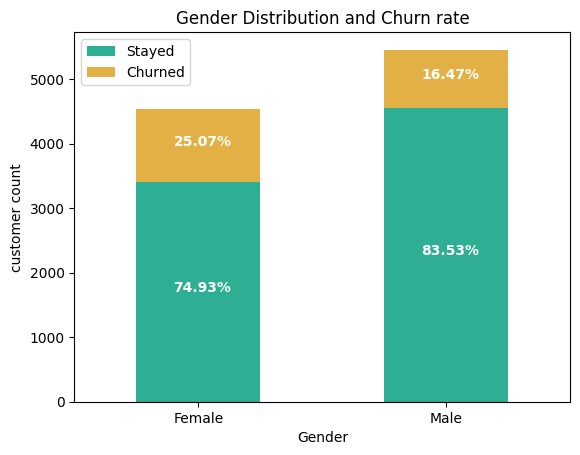

In [ ]:

colors = ["#2EAE92", "#E3B045"]

gender_churn = df.groupby(['Gender', 'Exited']).size().unstack()

ax = gender_churn.plot(kind='bar', stacked=True, color = colors, rot = 0)
ax.legend(labels = (['Stayed', 'Churned']))
ax.set_title('Gender Distribution and Churn rate')
ax.set_ylabel('customer count')

for p in ax.patches:
    w, h = p.get_width(), p.get_height()
    x,y = p.get_xy()
    if x == -0.25:
        gender_sum = gender_churn.T.sum()[0]
    else:
        gender_sum = gender_churn.T.sum()[1]

    temp = np.array(round(h*100/gender_sum, 2))

    anot = str(temp)
    ax.annotate(anot + '%', (x+0.15, y+h/2), color = 'white', weight = 'bold', size = 10)

In [ ]:
px.pie(df,values='Exited',names='Card Type',title = "Churned percentage based on Card Type")

In [ ]:
df["churned"] = np.where(df.Exited == 1 ,"churned","non-churned")
active_churned = df.query("churned == 'churned'").IsActiveMember.value_counts().reset_index()
active_churned

,index,IsActiveMember
0,0,1303
1,1,735


In [ ]:
product_df = df.groupby(["NumOfProducts","churned"]).Exited.count().reset_index()
px.bar(product_df, x = "NumOfProducts" , y = "Exited",color = "churned",
       text_auto=True,title = "churned & non-churned based on number of purchased products",
      color_discrete_sequence=["red", "green"])

In [ ]:
Card_df = df.groupby(["Tenure","churned"]).Exited.count().reset_index()

px.bar(Card_df, y = "Exited" , x = "Tenure",color = "churned",text_auto=True,color_discrete_sequence=["red", "green"],
      title = "churned & non-churned based on Tenure")

In [ ]:
px.scatter(df,"NumOfProducts","CreditScore",color="churned",
          opacity=0.3,color_discrete_sequence=["red", "green"],title = "churned & non-churned based on the number of purchased products")

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
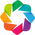

/usr/local/lib/python3.10/dist-packages/holoviews/core/util.py:1585: PanelDeprecationWarning:

'param_value_if_widget' is deprecated and will be removed in version 1.4, use 'transform_reference' instead.

/usr/local/lib/python3.10/dist-packages/holoviews/core/util.py:1585: PanelDeprecationWarning:

'param_value_if_widget' is deprecated and will be removed in version 1.4, use 'transform_reference' instead.



:Sankey   [Geography,churned]   (Exited)

In [ ]:
country_df = df.groupby(["Geography","churned"]).Exited.count().reset_index()
hv.extension("bokeh")
sankey_diag = hv.Sankey(country_df)
sankey_diag.opts(cmap='Dark2',edge_color='Geography',edge_line_width=0,node_alpha=0.5,
                 node_width=40,width=600, height=400, bgcolor="snow",
                 title="Flow of churned and non-churned clients based on country",)

Important observation about **Complain Feature**

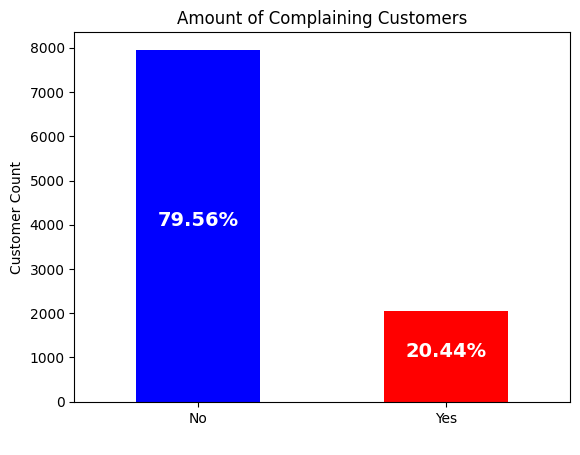

In [ ]:
#Finding the percentage of customers that complain
colors = ["#0000FF", "#FF0000"]

ax = df['Complain'].value_counts().plot(kind='bar', rot = 0, color = colors)

ax.set_title("Amount of Complaining Customers")
ax.set_ylabel("Customer Count")
ax.set_xlabel(" ")
ax.set_xticklabels(['No', 'Yes'])

for p in ax.patches:
    w, h = p.get_width(), p.get_height()
    x,y = p.get_xy()
    temp = np.array((h*100/len(df)))
    anot = str(temp)
    ax.annotate(anot + '%', (x+w/4-.04, h/2), color = 'white', weight = 'bold', size = 14)

In [ ]:
complain_churn = df.groupby(['Complain', 'Exited']).size().unstack()
complain_churn

Exited,0,1
Complain,,
0,7952,4
1,10,2034


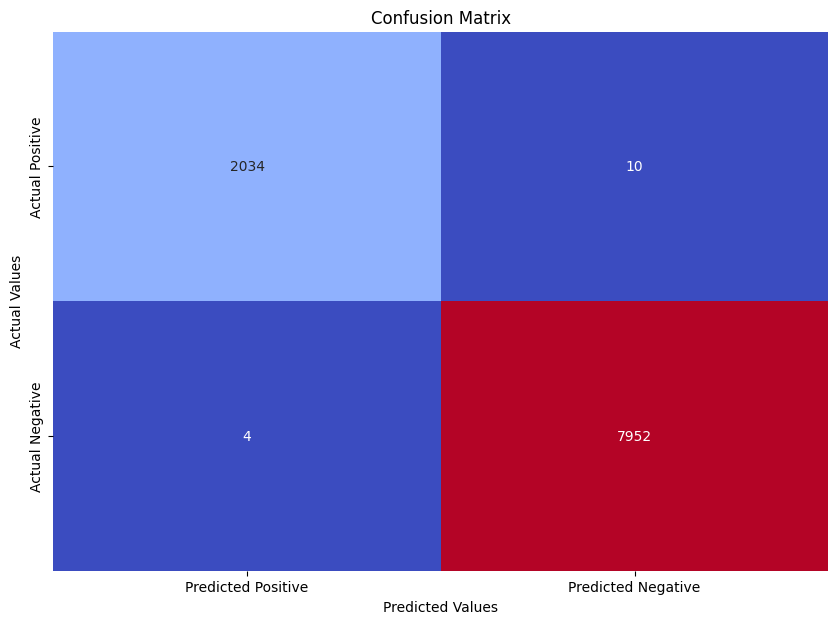

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Constructing the confusion matrix data as a DataFrame

confusion_matrix_data = {
    'Predicted Positive': [2034, 4],  # TP and FP
    'Predicted Negative': [10, 7952]   # FN and TN
}

conf_matrix_df = pd.DataFrame(confusion_matrix_data, index=['Actual Positive', 'Actual Negative'])

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='coolwarm', cbar=False)

# Adding labels and title
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

plt.show()


In [ ]:
#For visualization we added a churned column, we need to remove it for Model construction
df = df.drop(columns=(['churned']))

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


**First Model**: Random Forest Tree Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

#one hot encoding
bank_dummies = pd.get_dummies(df)

#Assigning Y to Exited (target) and dropping it from x shortly
y = bank_dummies['Exited'].values
X = bank_dummies.drop(columns = ['Exited'])

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

model_rf = RandomForestClassifier(n_estimators=1000, oob_score= True, random_state=77, max_leaf_nodes=30)

model_rf.fit(X_train, y_train)

preds = model_rf.predict(X_test)

metrics.accuracy_score(y_test, preds)

0.999

In [ ]:
bank_dummies.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,...,464,1,0,0,1,0,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,...,456,0,0,1,1,0,1,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,...,377,1,0,0,1,0,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,...,350,1,0,0,1,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,...,425,0,0,1,1,0,0,1,0,0


<Axes: >

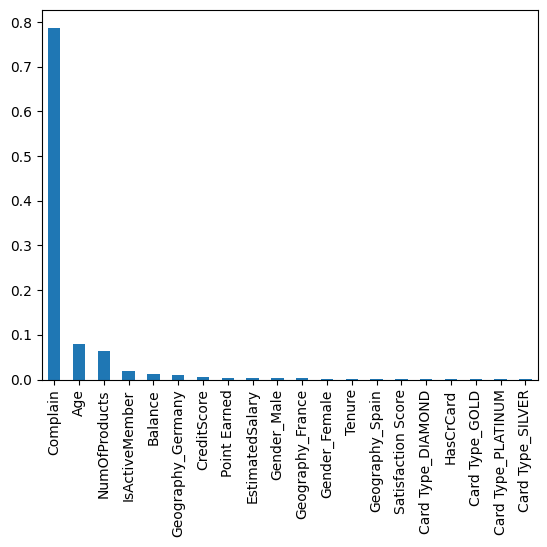

In [ ]:
#Finding important features and plotting them based on their affect on the model
forest_importances = pd.Series(model_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
forest_importances.plot(kind='bar')

#Complain causing bias for our dataset

In [ ]:

y = bank_dummies['Exited'].values
X = bank_dummies.drop(columns = ['Exited', 'Complain']) #Dropping Complain

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3) #Test size changed from default 20:80 to 40:60
#Valid parameter finetuning

model_rf = RandomForestClassifier(n_estimators=1000, oob_score= True, random_state=77, max_leaf_nodes=30)

model_rf.fit(X_train, y_train)

preds = model_rf.predict(X_test)

metrics.accuracy_score(y_test, preds)


0.8433333333333334

<Axes: >

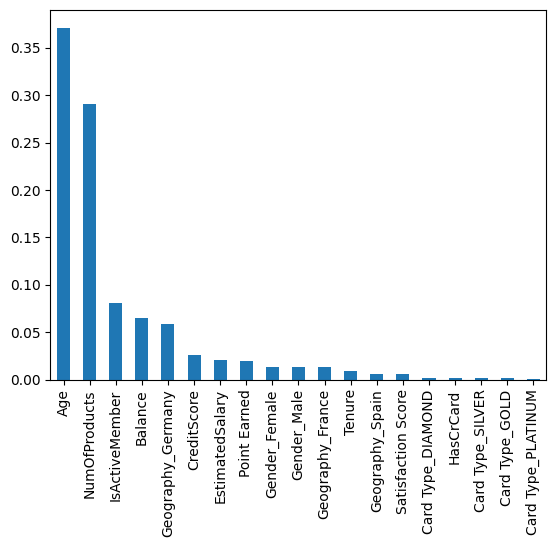

In [ ]:
#Confirming our observation about Complain Column
forest_importances = pd.Series(model_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
forest_importances.plot(kind='bar')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Preparing the feature matrix and target vector
y = bank_dummies['Exited'].values
X = bank_dummies.drop(columns=['Exited', 'Complain'])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Random Forest classifier with 'entropy' as the criterion for the split quality
model_rf = RandomForestClassifier(n_estimators=1000, oob_score=True, criterion='entropy', random_state=77, max_leaf_nodes=30)

# Training the model
model_rf.fit(X_train, y_train)

# Making predictions
preds = model_rf.predict(X_test)

# Calculating the accuracy
accuracy = accuracy_score(y_test, preds)
print(f"Accuracy with entropy: {accuracy}")

Accuracy with entropy: 0.847


In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Select the first tree from the random forest model
single_tree = model_rf.estimators_[0]

# Export the tree to DOT format for visualization
dot_data = export_graphviz(
    single_tree,
    out_file=None,
    feature_names=X.columns,
    class_names=['Not Exited', 'Exited'],
    filled=True,
    special_characters=True,
    impurity=True
)

# Create a graph from the DOT data and display it
graph = graphviz.Source(dot_data)
graph.render('entropy_tree')  # This will save the tree as a PDF file named 'entropy_tree.pdf'


'entropy_tree.pdf'

**Second Model**: Logistics Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Drop 'Complain' and set 'Exited' as the target variable
X = bank_dummies.drop(columns=['Exited', 'Complain'])
y = bank_dummies['Exited'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling for better performance of the logistic regression
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


logistic_classifier = LogisticRegression(random_state=0)
logistic_classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = logistic_classifier.predict(X_test)

# Generate the confusion matrix, classification report, and accuracy score
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(conf_matrix)
print(class_report)
print(f'Accuracy of the model: {accuracy}')


[[1528   67]
 [ 309   96]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1595
           1       0.59      0.24      0.34       405

    accuracy                           0.81      2000
   macro avg       0.71      0.60      0.61      2000
weighted avg       0.78      0.81      0.78      2000

Accuracy of the model: 0.812


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = bank_dummies.drop(columns=['Exited', 'Complain'])
y = bank_dummies['Exited']

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Split the dataset into training and testing sets after SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.4, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions
predictions = rf_classifier.predict(X_test)

# Calculate metrics
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(f"Accuracy: {accuracy_score(y_test, predictions)}")

[[3023  231]
 [ 410 2706]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      3254
           1       0.92      0.87      0.89      3116

    accuracy                           0.90      6370
   macro avg       0.90      0.90      0.90      6370
weighted avg       0.90      0.90      0.90      6370

Accuracy: 0.8993720565149137


**Third Model**: SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X = bank_dummies.drop(columns=['Exited'])  # Keeping 'Complain' this time
y = bank_dummies['Exited']

# Create a SMOTE object
smote = SMOTE(random_state=42)

# Create a SVM Classifier with linear kernel
svm_classifier = SVC(kernel='linear', random_state=42)

# Create a pipeline that first applies SMOTE then fits the SVM model
pipeline = Pipeline([
    ('smote', smote),
    ('scaler', StandardScaler()),  # Scale features for SVM
    ('svm', svm_classifier)
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
predictions = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(classification_report(y_test, predictions))
print(f"SVM Accuracy without SMOTE: {accuracy}")



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

SVM Accuracy without SMOTE: 0.999


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


X = bank_dummies.drop(columns=['Exited', 'Complain'])  # Keeping 'Complain' this time
y = bank_dummies['Exited']

# Create a SMOTE object
smote = SMOTE(random_state=42)

# Create a SVM Classifier with linear kernel
svm_classifier = SVC(kernel='linear', random_state=42)

# Create a pipeline that first applies SMOTE then fits the SVM model
pipeline = Pipeline([
    ('smote', smote),
    ('scaler', StandardScaler()),  # Scale features for SVM
    ('svm', svm_classifier)
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
predictions = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"SVM Accuracy with SMOTE: {accuracy}")



SVM Accuracy with SMOTE: 0.8035
